In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [15]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [17]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01  # Normalized initialization
    b1 = np.zeros((hidden_size, 1))  # Zero initialization for biases
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def relu_activation(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax_activation(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = relu_activation(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax_activation(Z2)
    activations = (Z1, A1, Z2, A2)
    return activations

def convert_to_one_hot(Y, num_classes):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y, num_examples):
    one_hot_Y = convert_to_one_hot(Y, A2.shape[0])
    dZ2 = A2 - one_hot_Y
    dW2 = np.dot(dZ2, A1.T) / num_examples
    db2 = np.sum(dZ2, axis=1, keepdims=True) / num_examples
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / num_examples
    db1 = np.sum(dZ1, axis=1, keepdims=True) / num_examples
    gradients = (dW1, db1, dW2, db2)
    return gradients

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def predict_classes(A2):
    return np.argmax(A2, axis=0)

def calculate_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def run_gradient_descent(X, Y, learning_rate, num_iterations, input_size, hidden_size, output_size):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y, X.shape[1])
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            predictions = predict_classes(A2)
            accuracy = calculate_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.2f}")
    return W1, b1, W2, b2


In [18]:
W1, b1, W2, b2 = run_gradient_descent(X_train, Y_train, 0.10, 500,784,10,10)

Iteration 0: Accuracy = 0.09
Iteration 10: Accuracy = 0.12
Iteration 20: Accuracy = 0.17
Iteration 30: Accuracy = 0.21
Iteration 40: Accuracy = 0.21
Iteration 50: Accuracy = 0.22
Iteration 60: Accuracy = 0.23
Iteration 70: Accuracy = 0.27
Iteration 80: Accuracy = 0.33
Iteration 90: Accuracy = 0.42
Iteration 100: Accuracy = 0.54
Iteration 110: Accuracy = 0.63
Iteration 120: Accuracy = 0.69
Iteration 130: Accuracy = 0.73
Iteration 140: Accuracy = 0.76
Iteration 150: Accuracy = 0.77
Iteration 160: Accuracy = 0.79
Iteration 170: Accuracy = 0.80
Iteration 180: Accuracy = 0.81
Iteration 190: Accuracy = 0.82
Iteration 200: Accuracy = 0.82
Iteration 210: Accuracy = 0.83
Iteration 220: Accuracy = 0.84
Iteration 230: Accuracy = 0.84
Iteration 240: Accuracy = 0.85
Iteration 250: Accuracy = 0.85
Iteration 260: Accuracy = 0.85
Iteration 270: Accuracy = 0.86
Iteration 280: Accuracy = 0.86
Iteration 290: Accuracy = 0.86
Iteration 300: Accuracy = 0.87
Iteration 310: Accuracy = 0.87
Iteration 320: Accu

Prediction:  [6]
Label:  6


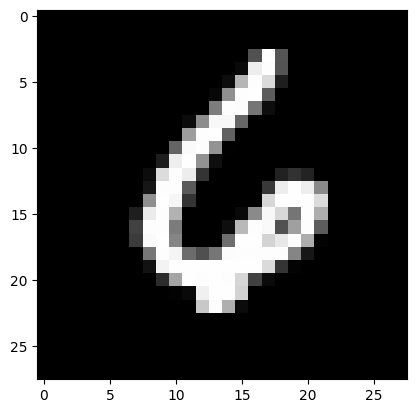

Prediction:  [3]
Label:  3


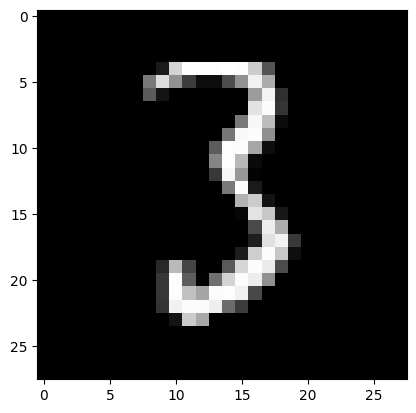

Prediction:  [7]
Label:  7


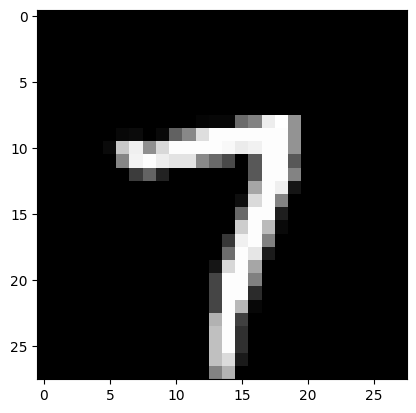

Prediction:  [2]
Label:  2


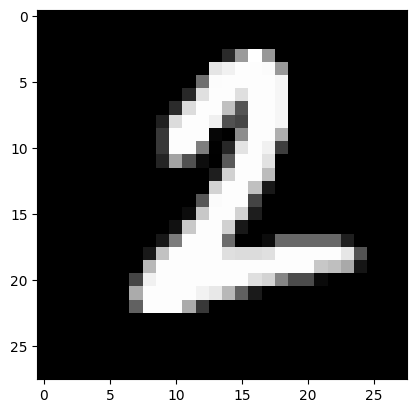

0.885

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = predict_classes(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
test_prediction(999,W1,b1,W2,b2)
test_prediction(15,W1,b1,W2,b2)
test_prediction(21,W1,b1,W2,b2)
test_prediction(364,W1,b1,W2,b2)
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
calculate_accuracy(dev_predictions, Y_dev)